# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [18]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


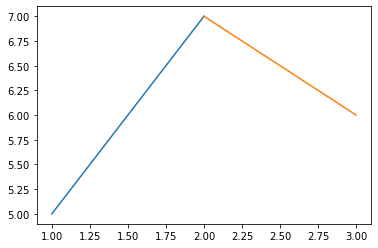

In [72]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


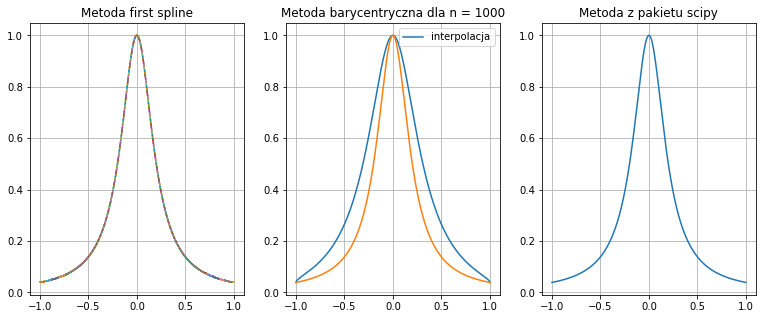

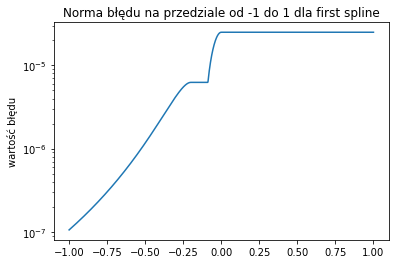

In [29]:
from scipy.interpolate import splprep, splev

x = np.linspace(-1, 1, 1001)
fx = lambda x: 1 / (25 * x ** 2 + 1)

a, b = main.first_spline(x, fx(x))
f = [[b[i], a[i]] for i in range(len(a))]

nodes = main.chebyshev_nodes(1000)
weights = main.bar_czeb_weights(1000)
barycentric_interpolation = main.barycentric_inte(nodes, fx(x), weights, x)

tck, u = splprep([x, fx(x)], s=0)
new_points = splev(u, tck)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))

error = []
error_x = []
error_y = []

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 1000)
    ax1.plot(x_new, PolyCoefficients(x_new, f[i]))
    error_x.append(x_new)
    error_y.append(PolyCoefficients(x_new, f[i]))
    error.append(main.L_inf(fx(np.array(error_x)), error_y))
ax1.set_title('Metoda first spline')
ax1.grid()

ax2.plot(x, barycentric_interpolation, label='interpolacja') 
ax2.set_title('Metoda barycentryczna dla n = 1000')
ax2.plot(x, fx(x))
ax2.grid()
ax2.legend()

ax3.plot(new_points[0], new_points[1])
ax3.set_title('Metoda z pakietu scipy')
ax3.grid()
plt.show()

x = np.linspace(-1, 1, 1000)
plt.semilogy(x, error)
plt.title('Norma błędu na przedziale od -1 do 1 dla first spline')
plt.ylabel('wartość błędu')
plt.show()

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


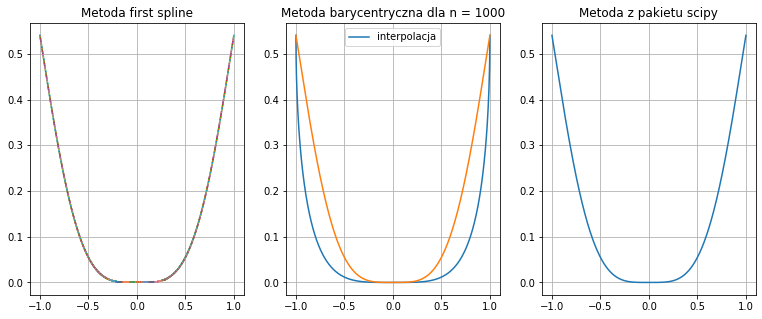

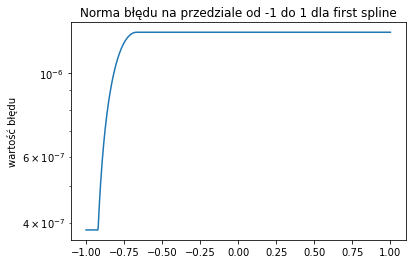

In [31]:
fx = lambda x: np.cos(x) * x ** 4
x = np.linspace(-1, 1, 1001)

a, b = main.first_spline(x, fx(x))
f = [[b[i], a[i]] for i in range(len(a))]

nodes = main.chebyshev_nodes(1000)
weights = main.bar_czeb_weights(1000)
barycentric_interpolation = main.barycentric_inte(nodes, fx(x), weights, x)

tck, u = splprep([x, fx(x)], s=0)
new_points = splev(u, tck)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))

error = []
error_x = []
error_y = []

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 1000)
    ax1.plot(x_new, PolyCoefficients(x_new, f[i])) 
    error_x.append(x_new)
    error_y.append(PolyCoefficients(x_new, f[i]))
    error.append(main.L_inf(fx(np.array(error_x)), error_y))

ax1.set_title('Metoda first spline')
ax1.grid()

ax2.plot(x, barycentric_interpolation, label='interpolacja')
ax2.set_title('Metoda barycentryczna dla n = 1000')
ax2.plot(x, fx(x))
ax2.grid()
ax2.legend()

ax3.plot(new_points[0], new_points[1])
ax3.set_title('Metoda z pakietu scipy')
ax3.grid()
plt.show()

x = np.linspace(-1, 1, 1000)
plt.semilogy(x, error)
plt.title('Norma błędu na przedziale od -1 do 1 dla first spline')
plt.ylabel('wartość błędu')
plt.show()

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:


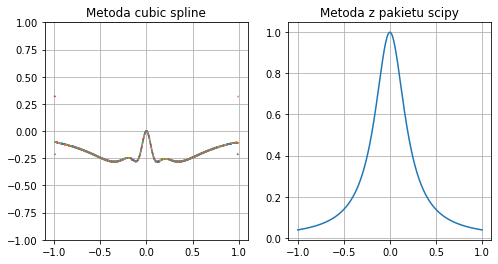

In [10]:
from scipy.interpolate import splprep, splev

x = np.linspace(-1, 1, 1001)
fx = lambda x: 1 / (25 * x ** 2 + 1)

b, c, d = main.cubic_spline(x, fx(x))
f = [[0, b[i], c[i], d[i]] for i in range(len(d))]

tck, u = splprep([x, fx(x)], s=0)
new_points = splev(u, tck)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

for i in range(len(x) - 1):
        x_new = np.linspace(x[i], x[i + 1], 1000)
        ax1.plot(x_new, PolyCoefficients(x_new, f[i]))
ax1.set_title('Metoda cubic spline')
ax1.grid()
ax1.set_ylim(-1, 1)

ax2.plot(new_points[0], new_points[1])
ax2.set_title('Metoda z pakietu scipy')
ax2.grid()
plt.show()

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:


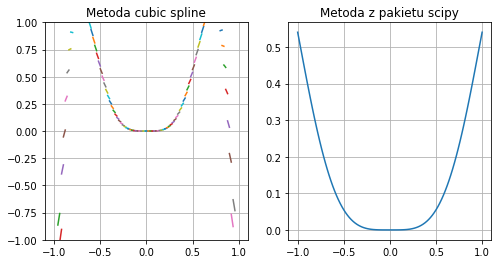

In [14]:
from scipy.interpolate import splprep, splev

x = np.linspace(-1, 1, 101)
fx = lambda x: np.cos(x) * x ** 4

b, c, d = main.cubic_spline(x, fx(x))
f = [[0, b[i], c[i], d[i]] for i in range(len(d))]

tck, u = splprep([x, fx(x)], s=0)
new_points = splev(u, tck)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

for i in range(len(x) - 1):
        x_new = np.linspace(x[i], x[i + 1], 100)
        ax1.plot(x_new, PolyCoefficients(x_new, f[i]))
ax1.set_title('Metoda cubic spline')
ax1.grid()
ax1.set_ylim(-1, 1)

ax2.plot(new_points[0], new_points[1])
ax2.set_title('Metoda z pakietu scipy')
ax2.grid()
plt.show()

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

Jacobi Method Output:


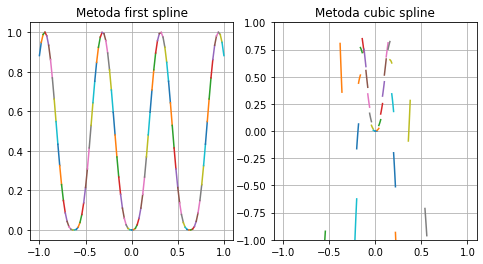

In [15]:
from scipy.interpolate import splprep, splev

x = np.linspace(-1, 1, 101)
fx = lambda x: (abs(np.sin(5 * x))) ** 3

a, b = main.first_spline(x, fx(x))
f1 = [[b[i], a[i]] for i in range(len(a))]

b, c, d = main.cubic_spline(x, fx(x))
f2 = [[0, b[i], c[i], d[i]] for i in range(len(d))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 100)
    ax1.plot(x_new, PolyCoefficients(x_new, f1[i])) 
ax1.set_title('Metoda first spline')
ax1.grid()

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 100)
    ax2.plot(x_new, PolyCoefficients(x_new, f2[i]))
ax2.set_title('Metoda cubic spline')
ax2.set_ylim(-1, 1)
ax2.grid()
plt.show()

Wnioski
Zapoznałem się z kolejnymi metodami interpolacji, tym razem za pomocą dzielenia danego przedziału na skończoną ilość mniejszych przedziałów, gdzie funkcja jest aproksymowana poprzez wyznaczanie współczynników wielomianów stopnia pierwszego (funkcja first_spline) i stopnia trzeciego (cubic_spline). Porównywałem je z metodami interpolacji poznanymi na poprzednich zajęciach, przez co utrwaliłem wiedzę z poprzedniego tygodnia.
Metoda barycentryczna charakteryzuje się największą niedokładnością z analizowanych w tym sprawozdaniu aproksymacji.

Cubic spline nie do końca dobrze działa - nie potrafiłem wyznaczyć współczynników wyrazu wolnego (a * x^0).